[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mosleh-exeter/BEM1025/blob/main/sessions/19-Session%2009%20Functions%20in%20Pandas-practice.ipynb)

# Session 9.1 functions-practice

# 0. Let's load and install some libraries

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

# 1. Let's load some data

In [ ]:
# similar to reading data from csv file, we can read data from excel sheets, we need to specify which column we need to read data from
# this data is a sample from comercial software Tableau
df=pd.read_excel('https://www.dropbox.com/s/2fijssn8w93bi0q/Superstore.xls?dl=1',dtype={'Order Date':'str'})
df.head(2)

#### **Note 1**:
####    To extract some characters (letters) from a string X you can use X[i:j] where i indicates the first character and j-1 indicates the last character 

In [ ]:
X='This is a book'
print ('first letter:', X[0],'second letter:', X[1])
print ('first two letters:',X[:2],'or', X[0:2])

#### **Note 2**:
####    To compare two variables you can use "A==B" which returns True if A and B are equal and False if they are not. 
#### This is similar to write an if:

In [15]:
A=2
B=3
C= (A==B)
print(C)

if A==B:
    C=True
if A!=B:
    C=False
print(C)

False
False


### For each of the following tasks using pandas apply

### **Task 1**. Create a new column in the dataset that shows 'true' if the order was made in the US, and 'false' if made in other places (e.g., Canada). Use order ID

#### TIP: You need to check the first three letters of Order ID
#### TIP: To extract some characters (letters) from a string you can use X[i:j] where i indicates the first character and j-1 indicates the last character 

In [14]:
df['US']=df['Order ID'].apply(lambda x:x[:3]=='US-')

### **Task 2**. Create a new column that shows how many years has passed since the order was created using Order Date

#### TIP: You need to extract first 4 letters/characters of Order ID. To change a string to number you can use int(X) and then find 2022-int(X)

In [37]:
def year_calc(x):
    year=x[:4]
    return 2021-int(year)
df['order_age']=df['Order Date'].apply(year_calc)


### **Task 3**. Create a new column that discretize the value of Sales to low: <200, mid: >=200 and <1000, high: >=1000
#### TIP: You may need to transform the dataset to a wide dataset containing a column for Sales

<AxesSubplot:xlabel='sales_level', ylabel='count'>

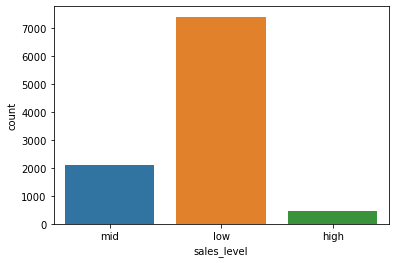

In [12]:
def discretize(x):
    if x<200:
        return 'low'
    if x>1000:
        return 'high'
    return 'mid'


df[(df['variable']=='Sales')]['value'].apply(discretize)
df_pivoted=pd.pivot_table(df,index=['Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
        columns='variable',values='value')
df_pivoted.reset_index(inplace=True)
df_pivoted['sales_level']=df_pivoted['Sales'].apply(discretize)
sns.countplot(data=df_pivoted,x='sales_level')

### **Task 4**. Calculate profit margin per number of product sold
#### TIP : Divide profit by sales then divide the results by quantities
#### TIP: You may need to transform the dataset to a wide dataset containing  columns for Sales, Discount, Quantities, and Profit

In [13]:
df_pivoted['profit_margin_perunit']=df_pivoted.apply(lambda row:(row['Profit']/row['Sales'])/(row['Quantity']),axis=1)